# Test di un generatore di Numeri Casuali

Si valutino le capacità di un generatore di numeri casuali fornito.

Dal momento che esso dovrebbe essere in grado di estrarre numeri casuali compresi nell'intervallo [0,1), ciò significa che il valor medio di un qualsiasi gruppo di variabili causali estratte deve essere pari a 1/2.

Sfruttando tale fatto si costruisca un dataset di 100 elementi ognuno ottenuto come media di 1000 estrazioni casuali del generatore.\
Quindi ne si calcoli la media cumulativa e la deviazione standard della media al variare nel numero di elementi considerati. Costruire un grafico del risultato.

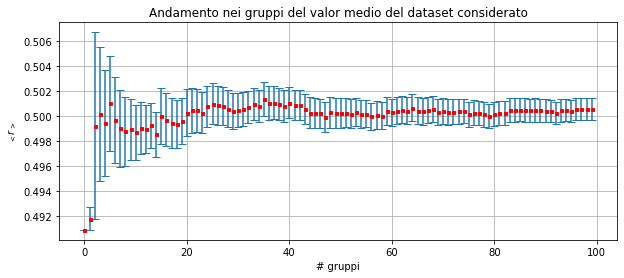

In [1]:

import matplotlib.pyplot as plt
import numpy


Av, dev_Av = numpy.loadtxt( "1.1/sim_out.txt", usecols= (0,1), delimiter= "\t", unpack= 'true' )
N = numpy.arange ( numpy.size(Av) )

plt.figure(figsize=(10, 4))
plt.errorbar( N, Av, yerr= dev_Av, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, linestyle= "none" )
plt.xlabel('# gruppi')
plt.ylabel(r'$_<r _>$')
plt.title('Andamento nei gruppi del valor medio del dataset considerato')
plt.grid(True)
plt.show()


Si noti anzitutto che il vettore Av contenga già dalla simulazione c++ i valori della media cumulativa, ed il vettore dev_Av la relativa deviazione standard della media a seconda del numero [i] di elementi del vettore Av considerati.

Come si osserva dal grafico:
- l'errore decresce all'aumentare del numero di gruppi considerato;
- la stima del valor medio del generatore, considerando l'errore associato risulta compatibile con il valore atteso 1/2;

### - Varianza

Un ulteriore test che è possibile effettuare con il generatore dato, su una distribuzione uniforme in [0,1) riguarda l'andamento della varianza.

Il valore atteso di tale osservabile è infatti pari a 1/12.

Tale osservabile è infine definita e calcolabile a partire dalla formula:

$$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$

Con il metodo precedentemente applicato alla stima del valor medio, stimare il valore della varianza e la relativa incertezza, quindi produrre un grafico normalizzato al valore stimato.

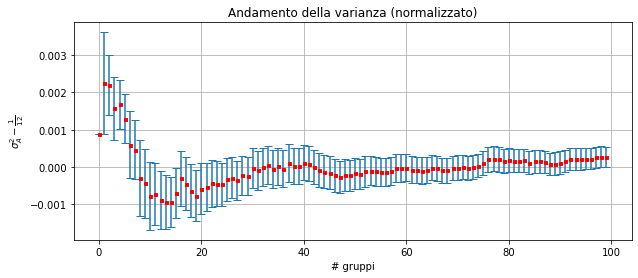

In [2]:

Av2, sigma2 = numpy.loadtxt( "1.1/sim_out.txt", usecols= (2,3), delimiter= "\t", unpack= 'true' )

plt.figure(figsize=(10, 4))
plt.errorbar( N, Av2-1/12, yerr= sigma2, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none" )
plt.xlabel('# gruppi')
plt.ylabel(r'$\sigma^2_A - \frac{1}{12}$')
plt.title('Andamento della varianza (normalizzato)')
plt.grid(True)
plt.show()


Come si osserva dal grafico:
- l'errore decresce all'aumentare del numero di gruppi considerato;
- la stima della varianza del generatore, considerando l'errore associato risulta compatibile, dopo aver normalizzato l'asse delle ordinate sottraendo il valore atteso di 1/12, con lo zero; 

### - Test del $\chi^2$

Si ipotizzi ora di condurre una simulazione utilizzando il generatore dato.\
Si suddivida l'intervallo [0,1) in M intervalli identici, quindi si estraggano n valori casuali dati dal generatore.

Ci si attende che, essendo la distribuzione uniforme in [0,1) ricadano in ogni intervallo M un numero di elementi pari a $np = n\times 1/M= n/M$.

Si effettuino 100 esperimenti e conseguenti test del $\chi^2$ calcolato come:

$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$

dove $O_i$ risulta la frequenza di accadimento rilevata, mentre $E_i$ quella attesa, pari a n/M.

Si scelgano arbitrariamente i valori:
- n= $10^4 \ $  numeri casuali estratti;
- M= $10^2 \ $  intervalli equivalenti in [0,1);

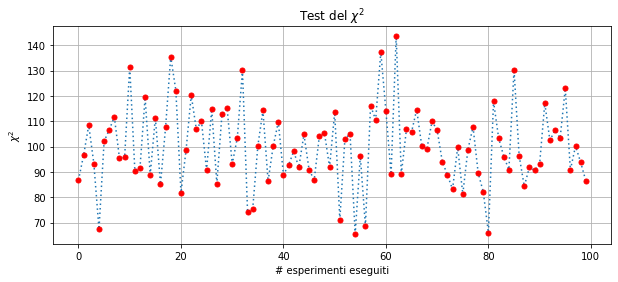

In [3]:

Chi2 = numpy.loadtxt( "1.1/chi2.txt", usecols= (0), unpack= 'true' )

plt.figure(figsize=(10, 4))    
plt.plot( N, Chi2, marker= '.', mfc= 'red', mec= 'red', ms= 10, linestyle= (0,(1,2)) )
plt.xlabel('# esperimenti eseguiti')
plt.ylabel('$\chi^2$')
plt.title('Test del $\chi^2$')
plt.grid(True)
plt.show()


Come si può osservare dal grafico i valori di $\chi^2$ ricavati sono distribuiti equamente sopra e sotto il valore atteso n/M= 100.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

# Verifica del CLT

Considerando il generatore di numeri casuali dato, si implementino alcune distribuzioni di probabilità arbitrarie.

Si verifichi quindi una conseguenza del CLT, ovvero il bacino di attrazione rappresentato dalla funzione di Gauss.\
Infine si verifichi anche il teorema di Levy e Khintchine, secondo cui ogni distribuzione stabile può essere bacino di attrazione, con il caso della distribuzione di Lorrentz-Cauchy.

Al fine di verificare quanto richiesto si considerino:
- distribuzione uniforme in [0,1);
- distribuzione esponenziale;
- una distribuzione Lorentz-Cauchy;

Per verificare la conseguenza del bacino di attrazione, produrre degli istogrammi nel range adeguato di 10'000 dati ottenuti come raggruppamenti di N= [1,2,10,100] numeri casuali estratti secondo la distribuzione di riferimento.

### - Distribuzione uniforme

Dalla simulazione in c++ si caricano quattro vettori indipendenti corrispondenti ai raggruppamenti di N= [1,2,10,100] i dati necessari estratti a partire da una distribuzione uniforme in [0,1).

In [4]:

U1, U2, U10, U100 = numpy.loadtxt( "1.2/sim_uniforme_out.txt", usecols= (0,1,2,3), delimiter= "\t", 
                                   unpack= 'true' )


Si costruiscono per i raggruppamenti N= 1, N= 2, N= 10, istogrammi adeguati.

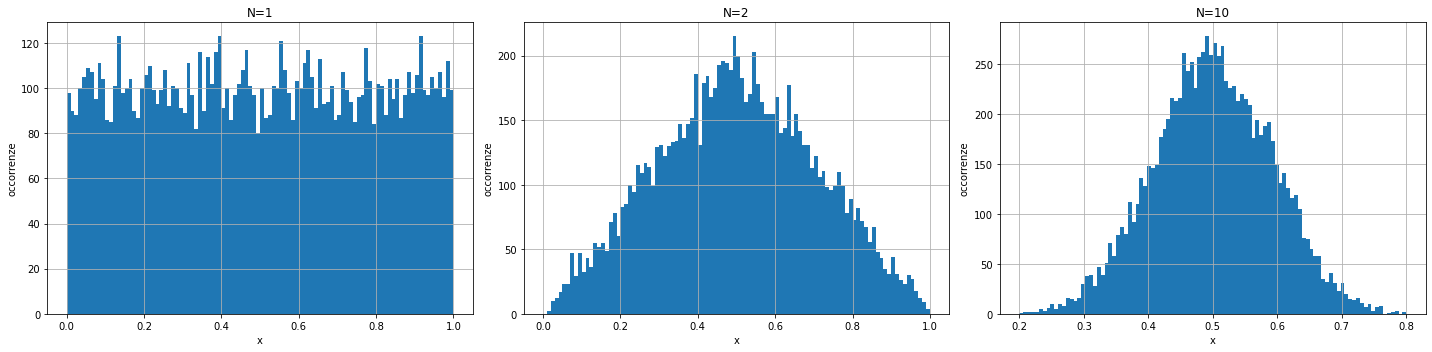

In [5]:

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].hist( U1, 100, range=(0,1) )
axs[0].set( xlabel= 'x', ylabel= 'occorrenze', title= 'N=1' )
axs[0].grid(True)

axs[1].hist( U2, 100, range=(0,1) )
axs[1].set( xlabel= 'x', ylabel= 'occorrenze', title= 'N=2' )
axs[1].grid(True)

axs[2].hist( U10, 100, range=(.2,.8) )
axs[2].set( xlabel= 'x', ylabel= 'occorrenze', title= 'N=10' )
axs[2].grid(True)

plt.tight_layout()
plt.show()


Infine, per il raggruppamento N= 100, oltre a costruire l'istogramma, si normalizza l'istogramma stesso per procedere anche ad un fit gaussiano che dovrebbe andare a rappresentare la funzione bacino di occorrenza.

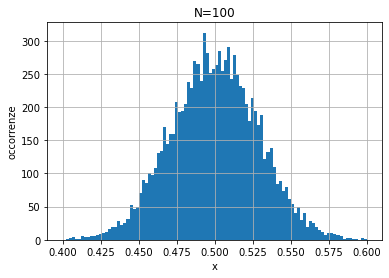

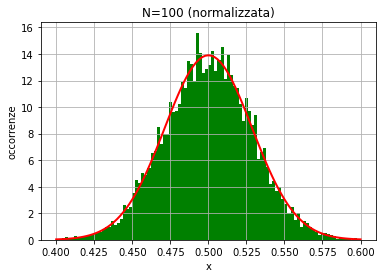

In [6]:

from scipy.stats import norm

n, bins, patches = plt.hist( U100, 100, range=(0.4,0.6) )

plt.xlabel('x')
plt.ylabel('occorrenze')
plt.title('N=100')
plt.grid(True)

plt.figure()

n, bins, patches = plt.hist( U100, 100, density=True, facecolor='g', range=(0.4,0.6) )

(mu, sigma) = norm.fit( U100 )
plt.plot( bins, norm.pdf( bins, mu, sigma ), linewidth=2, color= 'red' )

plt.xlabel('x')
plt.ylabel('occorrenze')
plt.title('N=100 (normalizzata)')
plt.grid(True)


Essendo la distribuzione utilizzata uniforme essa è a varianza finita, pertanto converge ad una gaussiana come limite asintotico.\
Ciò è definitivamente visibile nell'ultimo grafico, sebbene la somma N= 100 variabili casuali uniformi non rappresenti ancora un limite asintotico forte.

### - Distribuzione esponenziale

Dalla simulazione in c++ si carichino quattro vettori corrispondenti ai raggruppamenti di N= [1,2,10,100] dati estratti da una distribuzione esponenziale in $[0,+\infty)$.

Per estrarre valori casuali esponenziali secondo una distribuzione

$$p(x) = \lambda \exp(-\lambda x)$$

è conveniente utilizzare il metodo analitico della cumulativa ed estrarre quindi dei valori

$$x=-\frac{1}{\lambda}ln(1-y) \ \ \ \ y \in [0;1) $$

dove y è uniforme in [0,1), estremo escluso per le condizioni di esistenza di y.

Si scelgano arbitrariamente i valori delle costanti:
- $\lambda$= 1;

In [7]:

E1, E2, E10, E100 = numpy.loadtxt( "1.2/sim_exp_out.txt", usecols= (0,1,2,3), delimiter= "\t", unpack= 'true' )


Si costruiscono per i raggruppamenti N= 1, N= 2, N= 10, istogrammi adeguati.

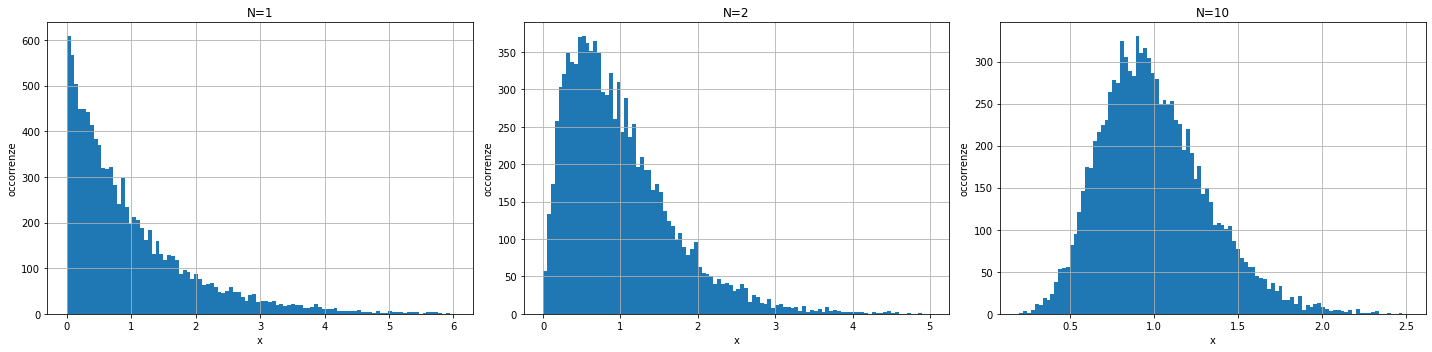

In [8]:

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].hist( E1, 100, range=(0,6) )
axs[0].set( xlabel= 'x', ylabel= 'occorrenze', title= 'N=1' )
axs[0].grid(True)

axs[1].hist( E2, 100, range=(0,5) )
axs[1].set( xlabel= 'x', ylabel= 'occorrenze', title= 'N=2' )
axs[1].grid(True)

axs[2].hist( E10, 100, range=(0.2,2.5) )
axs[2].set( xlabel= 'x', ylabel= 'occorrenze', title= 'N=10' )
axs[2].grid(True)

plt.tight_layout()
plt.show()


Infine per il raggruppamento N= 100, oltre a costruire l'istogramma, si normalizza l'istogramma stesso e si procede ad un fit gaussiano che dovrebbe rappresentare la funzione bacino di occorrenza.

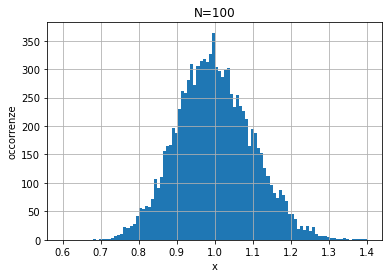

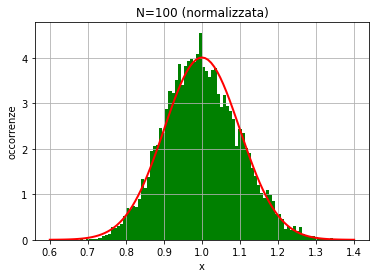

In [9]:

n, bins, patches = plt.hist( E100, 100, range=(0.6,1.4) )

plt.xlabel('x')
plt.ylabel('occorrenze')
plt.title('N=100')
plt.grid(True)

plt.figure()

n, bins, patches = plt.hist( E100, 100, density=True, facecolor='g', range=(0.6,1.4) )

(mu, sigma) = norm.fit( E100 )
plt.plot( bins, norm.pdf( bins, mu, sigma ), linewidth= 2, color= 'red' )

plt.xlabel('x')
plt.ylabel('occorrenze')
plt.title('N=100 (normalizzata)')
plt.grid(True)


Essendo la distribuzione esponenziale a varianza finita, converge ad una gaussiana come limite asintotico.\
Ciò è definitivamente visibile nell'ultimo grafico, sebbene la somma N= 100 variabili casuali estratte secondo p(x) non rappresenti un limite asintotico forte.

### - Lorentz

Dalla simulazione in c++ si carichino quattro vettori corrispondenti ai raggruppamenti di N= [1,2,10,100] dati estratti da una distribuzione di Lorentz-Cauchy in $(-\infty,+\infty)$.

Per estrarre valori casuali esponenziali secondo una distribuzione

$$p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$$

è conveniente utilizzare il metodo analitico della cumulativa ed estrarre quindi dei valori

$$x=\Gamma \ tan[\pi \ (y-\frac{1}{2})]+\mu \ \ \ \ y \in [0;1) $$

Si scelgano arbitrariamente i valori:
- $\Gamma$= 1;
- $\mu$= 0;

In [10]:

L1, L2, L10, L100 = numpy.loadtxt( "1.2/sim_Lorentz_out.txt", usecols= (0,1,2,3), delimiter= "\t", 
                                   unpack= 'true' )


Si costruiscono gli istogrammi desiderati.

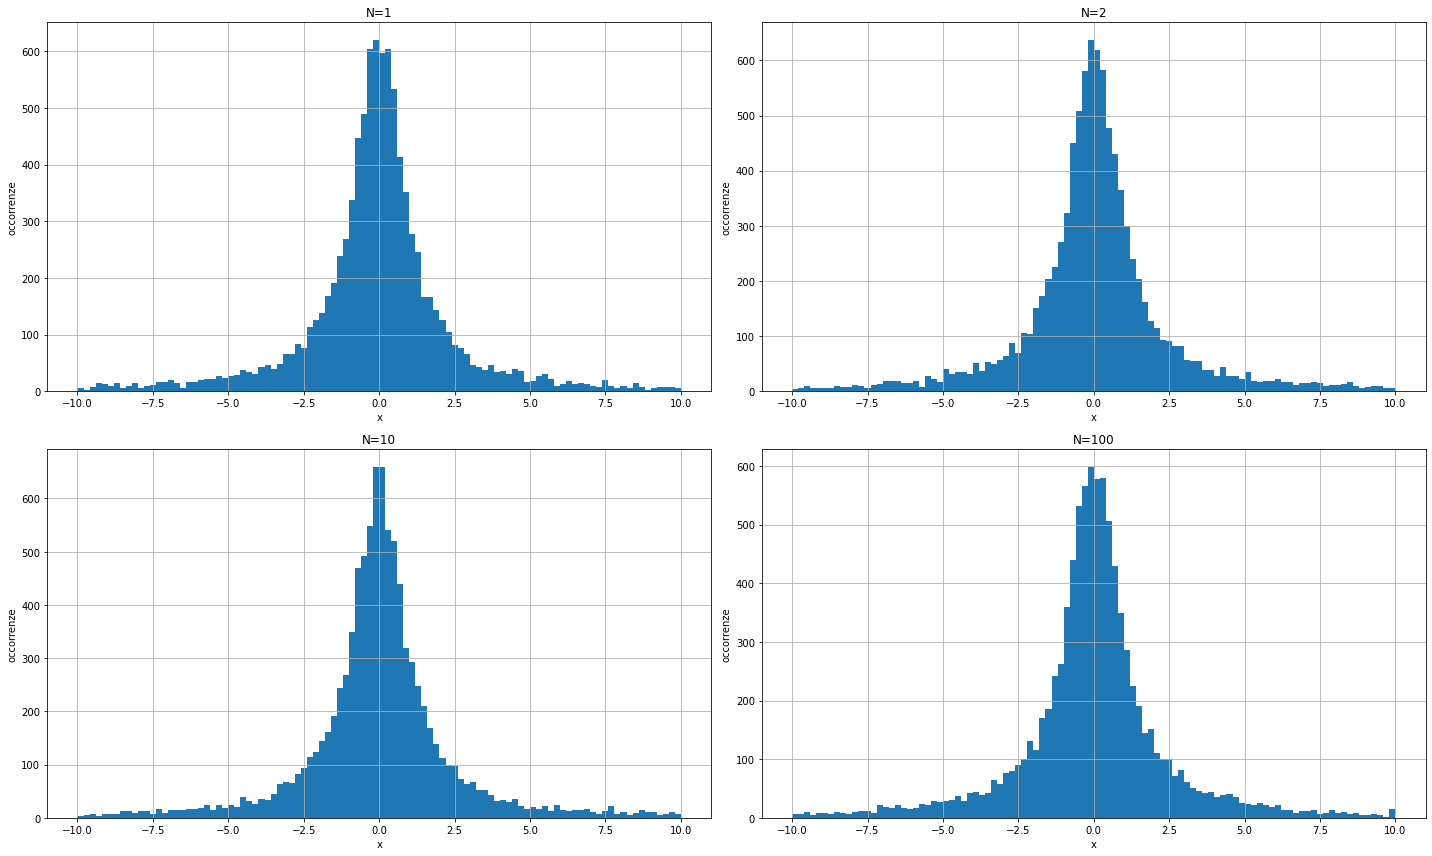

In [11]:

fig, axs = plt.subplots(2, 2, figsize=(20, 12))

axs[0][0].hist( L1, 100, range=(-10,10) )
axs[0][0].set( xlabel= 'x', ylabel= 'occorrenze', title= 'N=1' )
axs[0][0].grid(True)

axs[0][1].hist( L2, 100, range=(-10,10) )
axs[0][1].set( xlabel= 'x', ylabel= 'occorrenze', title= 'N=2' )
axs[0][1].grid(True)

axs[1][0].hist( L10, 100, range=(-10,10) )
axs[1][0].set( xlabel= 'x', ylabel= 'occorrenze', title= 'N=10' )
axs[1][0].grid(True)

axs[1][1].hist( L100, 100, range=(-10,10) )
axs[1][1].set( xlabel= 'x', ylabel= 'occorrenze', title= 'N=100' )
axs[1][1].grid(True)

plt.tight_layout()
plt.show()


Essendo la distribuzione di Lorentz a varianza infinita, essa non converge ad una gaussiana come limite asintotico.\
Tale distribuzione è tuttavia un caso particolare secondo il teorema di Levy-Khintchine, il quale afferma che ove L(x) sia stabile, essa può rappresentare un bacino di attrazione sotto determinate ipotesi.\
Essendo la distribuzione di Lorentz stabile, essa converge a se stessa come bacino di attrazione. Ciò è visibile dai quattro grafici di questa sezione che non variano seppur rappresentano raggruppamenti ad N diversi.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

# Eperimento di Buffon

Si consideri una griglia di larghezza d in uno spazio 2-dimensionale.\
Si considerino degli aghi di lunghezza L da gettare casualmente sulla griglia.\
Si tenga il conteggio di quanti aghi su un totale di M lanci incocciano la griglia ($N_{hit}$).\
Si può dimostrare, allora, che nel limite di infiniti tentativi e nel caso in cui L<d, vale l'equazione:

$$\pi = \frac{2L}{Pd} = \lim_{M \to \infty}\frac{2LM}{N_{hit}d}$$

Si definiscano arbitrariamente i valori utilizzati in questa simulazione:
- d= 5cm;
- L= 2.5cm;
- M= 1000 tentativi;

### - Analisi Statistica 

Si affronti ora un'analisi statistica per determinare come varia la stima del valore di $\pi$ e per determinare un'errore di tipo statistico associato a tale stima.

Per far ciò si consideri a tal proposito 100 stime di $\pi$.\
Dopo di che si considerino 100 medie di n stime di $\pi$. In particolare si considero i casi n= [10,100,1000].

Costruire quindi un grafico progressivo nelle 100 stime della media e vi si associ come errore una deviazione standard della media.\
Per far ciò si costruiscano delle funzioni apposite:

In [12]:

import math


def Media (X, n) :              #attenzione: n è la posizione nell'array
    return sum( X[:n+1] )/(n+1)

def Err (X, n):             #attenzione n è la posizione nell'array, vale N=(n+1) ovvero (N-1)=n
    if n==0 :
        return 0
    return math.sqrt( (Media(X**2, n) - Media(X, n)**2) / n )


Si importino a questo punto le 100 stime nei quattro casi indicati dalla simulazione dell'esperimento di Buffon effettuata in c++.

In [13]:

X1, X10, X100, X1000 = numpy.loadtxt( "1.3/sim_out.txt", usecols= (0,1,2,3), delimiter= "\t", unpack= 'true' )
    

Si allocano 4 diversi vettori per semplicità.\
Si ricorda che tali vettori contengono ora solamente dei dati grezzi della stima di $\pi$ calcolati come detto precedentemente; si necessita ora di costruire le medie progressive e le relative deviazioni standard della media per impostare i grafici richiesti.

#####  raggruppamento n=1:
Utilizzando le funzioni Media e Err si costruiscano due vettori della medesima dimensione del vettore $X_{1}$ che contengano rispettivamente la media cumulativa all'i-esimo valore contenuto in $X_{1}$ e la relativa deviazione standard della media.

Si pone il risultato in un grafico:

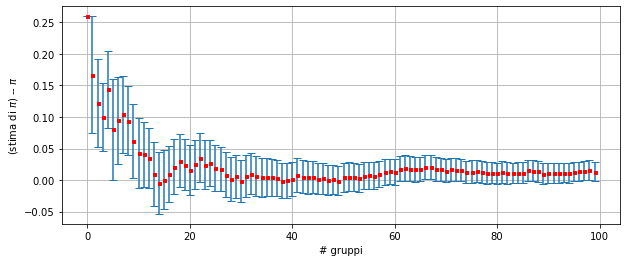

In [14]:

Av1= numpy.zeros( numpy.size(X1) )
dev_Av1= numpy.zeros( numpy.size(X1) )

for i in range( numpy.size(X1) ):
    Av1[i]= Media (X1, i)
    dev_Av1[i]= Err (X1, i)

N = numpy.arange ( numpy.size(Av1) )


plt.figure(figsize=(10, 4)) 
plt.errorbar( N, Av1-numpy.pi, yerr= dev_Av1, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('(stima di $\pi$) -- $\pi$')
#plt.title('andamento nei raggruppamenti di dimensione n=1')
plt.grid(True)
plt.show()


Per semplicità di visualizzazione si è normalizzato il grafico sottraendo il valore riconosciuto di $\pi$.

Si osservi come:
- l'errore statistico decresce con l'ampliamento del sottoinsieme di $X_{i}$ considerato;
- al netto di fluttuazioni iniziali, la stima di $\pi$ data dall'esperimento di Buffon è compatibile con il valore di $\pi$ riconosciuto considerato un errore statistico dettato dalla deviazione standard della media;

##### raggruppamento n=10:
Analogamente al caso precedente si analizza il vettore $X_{10}$.

Si pone il risulato in un grafico:

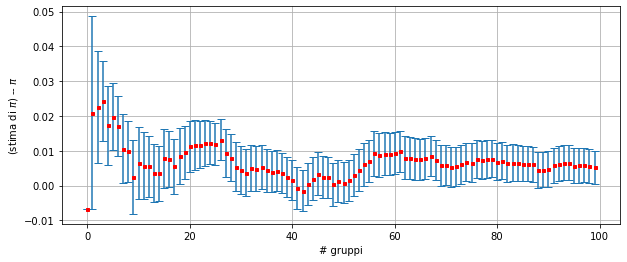

In [15]:

Av10= numpy.zeros( numpy.size(X10) )
dev_Av10= numpy.zeros( numpy.size(X10) )

for i in range( numpy.size(X10) ):
    Av10[i]= Media (X10, i)
    dev_Av10[i]= Err (X10, i)

    
plt.figure(figsize=(10, 4)) 
plt.errorbar( N, Av10-numpy.pi, yerr= dev_Av10, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3,
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('(stima di $\pi$) -- $\pi$')
#plt.title('andamento nei raggruppamenti di dimensione n=10')
plt.grid(True)
plt.show()


Per semplicità di visualizzazione si è normalizzato il grafico sottraendo il valore riconosciuto di $\pi$.

Si osservi analogamente al caso precedente:
- l'errore statistico decresce con l'ampliamento del sottoinsieme di $X_{i}$ considerato;
- al netto di fluttuazioni iniziali, la stima di $\pi$ data dall'esperimento di Buffon è compatibile con il valore di $\pi$ riconosciuto considerato un errore statistico dettato dalla deviazione standard della media;
- è variata la scala dell'asse delle ordinate, ciò significa che la stima è sempre più affidabile e l'errore è ridotto rispetto al caso precedente con un raggruppamento di misure di dimensione inferiore; 

##### raggruppamento n=100:
Come effettuato in precedenza, si analizza il vettore $X_{100}$.

Si pone il risulato in un grafico:

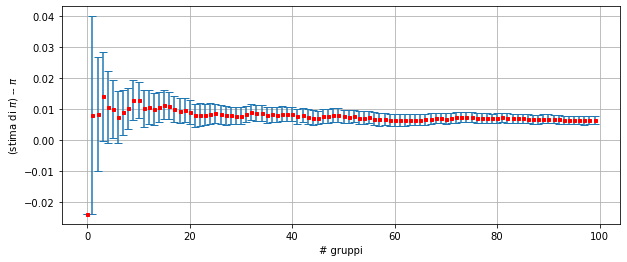

In [16]:

Av100= numpy.zeros( numpy.size(X100) )
dev_Av100= numpy.zeros( numpy.size(X100) )

for i in range( numpy.size(X100) ):
    Av100[i]= Media (X100, i)
    dev_Av100[i]= Err (X100, i)
    
plt.figure(figsize=(10, 4)) 
plt.errorbar( N, Av100-numpy.pi, yerr= dev_Av100, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('(stima di $\pi$) -- $\pi$')
#plt.title('andamento nei raggruppamenti  di dimensione n=100')
plt.grid(True)
plt.show()
    

Per semplicità di visualizzazione si è normalizzato il grafico sottraendo il valore riconosciuto di $\pi$.

Si osservi come in precedenza:
- l'errore statistico decresce con l'ampliamento del sottoinsieme di $X_{i}$ considerato;
- la stima di $\pi$ data dall'esperimento di Buffon diviene sempre più accurata, ma per via del concetto matematico di limite talvolta la compatibilità con il valore di $\pi$ su un numero ridotto di simulazioni può risultare scarsa;

###### raggruppamento n=1000
Si analizza il vettore $X_{1000}$.

Si pone il risulato in un grafico:

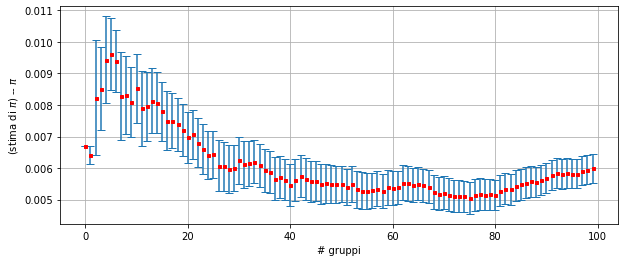

In [17]:

Av1000= numpy.zeros( numpy.size(X1000) )
dev_Av1000= numpy.zeros( numpy.size(X1000) )

for i in range( numpy.size(X1000) ):
    Av1000[i]= Media (X1000, i)
    dev_Av1000[i]= Err (X1000, i)

plt.figure(figsize=(10, 4))  
plt.errorbar( N, Av1000-numpy.pi, yerr= dev_Av1000, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel('(stima di $\pi$) -- $\pi$')
#plt.title('andamento nei raggruppamenti di dimensione n=1000')
plt.grid(True)
plt.show()


Per semplicità di visualizzazione si è normalizzato il grafico sottraendo il valore riconosciuto di $\pi$.

Si osservi:
- l'errore statistico decresce con l'ampliamento del sottoinsieme di $X_{i}$ considerato;
- al netto di fluttuazioni iniziali, la stima di $\pi$ data dall'esperimento di Buffon può comunque essere considerata compatibile con il valore di $\pi$ riconosciuto;
- è variata ulteriormente la scala dell'asse delle ordinate. La stima è sempre più affidabile e l'errore è ridotto rispetto a raggruppamenti di dimensione inferiore; 

### - Osservazioni:

Sarebbe stata altesì viabile una simulazione in cui anziché essere fissato M per la singola stima di $\pi$ ed analizzare successivamente 100 raggruppamenti di dimensione $n$ variabile di tale stima, si considerassero semplicemente 100 stime del valore di $\pi$ effettuate a seconda con un numero di tentativi osservati di $n$ lanci di ago.\
In tal caso sarebbe stato opportuno aumentare almeno di 2-3 ordini di grandezza il valore di $n$ per ottenere delle stime affidabili entro la considerazione del concetto di limite matematico e considerando una stima dell'incertezza di tipo statistico.